In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

0.718951


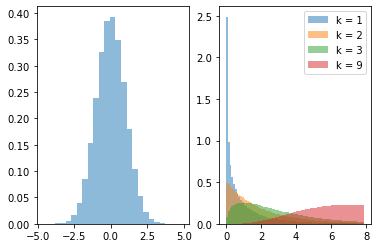

In [66]:
# if Z...Zk are standard normal random variables hten the sum of their squares 
# is distirbutied according to the chi squed distribution with k DOF

n = 1000000

#standard normal sample
Z_sample = np.random.normal(0,1,n)

#chi2 sample with 1 dof
k1chi2sample = np.random.normal(0,1,n)**2

#chi2 sample with 2 dof
k2chi2sample = np.random.normal(0,1,n)**2 + np.random.normal(0,1,n)**2

def chik(k):
    output = np.random.normal(0,1,n)**2
    for i in range(k-1):
        output += np.random.normal(0,1,n)**2

    return output

#ploting
fig = plt.figure

ax1 = plt.subplot(121)
ax1.hist(Z_sample,25, density = True, alpha = 0.5)

ax2 = plt.subplot(122)
bw = 0.1
k = 9
bins = [i*bw for i in range(0,int(8/bw))]
ax2.hist(k1chi2sample,bins,alpha = 0.5, density = True, label = "k = 1")
ax2.hist(k2chi2sample,bins,alpha = 0.5, density = True, label = "k = 2")
ax2.hist(chik(3),bins,alpha = 0.5, density = True, label = "k = 3")
ax2.hist(chik(k),bins,alpha = 0.5, density = True, label = "k = {}".format(k))
ax2.legend()

print(sum([ i>0.13 for i in k1chi2sample])/n)

0.718951


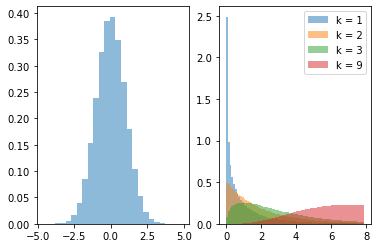

In [ ]:
# if Z...Zk are standard normal random variables hten the sum of their squares 
# is distirbutied according to the chi squed distribution with k DOF

n = 1000000

#standard normal sample
Z_sample = np.random.normal(0,1,n)

#chi2 sample with 1 dof
k1chi2sample = np.random.normal(0,1,n)**2

#chi2 sample with 2 dof
k2chi2sample = np.random.normal(0,1,n)**2 + np.random.normal(0,1,n)**2

def chik(k):
    output = np.random.normal(0,1,n)**2
    for i in range(k-1):
        output += np.random.normal(0,1,n)**2

    return output

#ploting
fig = plt.figure

ax1 = plt.subplot(121)
ax1.hist(Z_sample,25, density = True, alpha = 0.5)

ax2 = plt.subplot(122)
bw = 0.1
k = 9
bins = [i*bw for i in range(0,int(8/bw))]
ax2.hist(k1chi2sample,bins,alpha = 0.5, density = True, label = "k = 1")
ax2.hist(k2chi2sample,bins,alpha = 0.5, density = True, label = "k = 2")
ax2.hist(chik(3),bins,alpha = 0.5, density = True, label = "k = 3")
ax2.hist(chik(k),bins,alpha = 0.5, density = True, label = "k = {}".format(k))
ax2.legend()

print(sum([ i>0.13 for i in k1chi2sample])/n)

# pearsons chi squared test



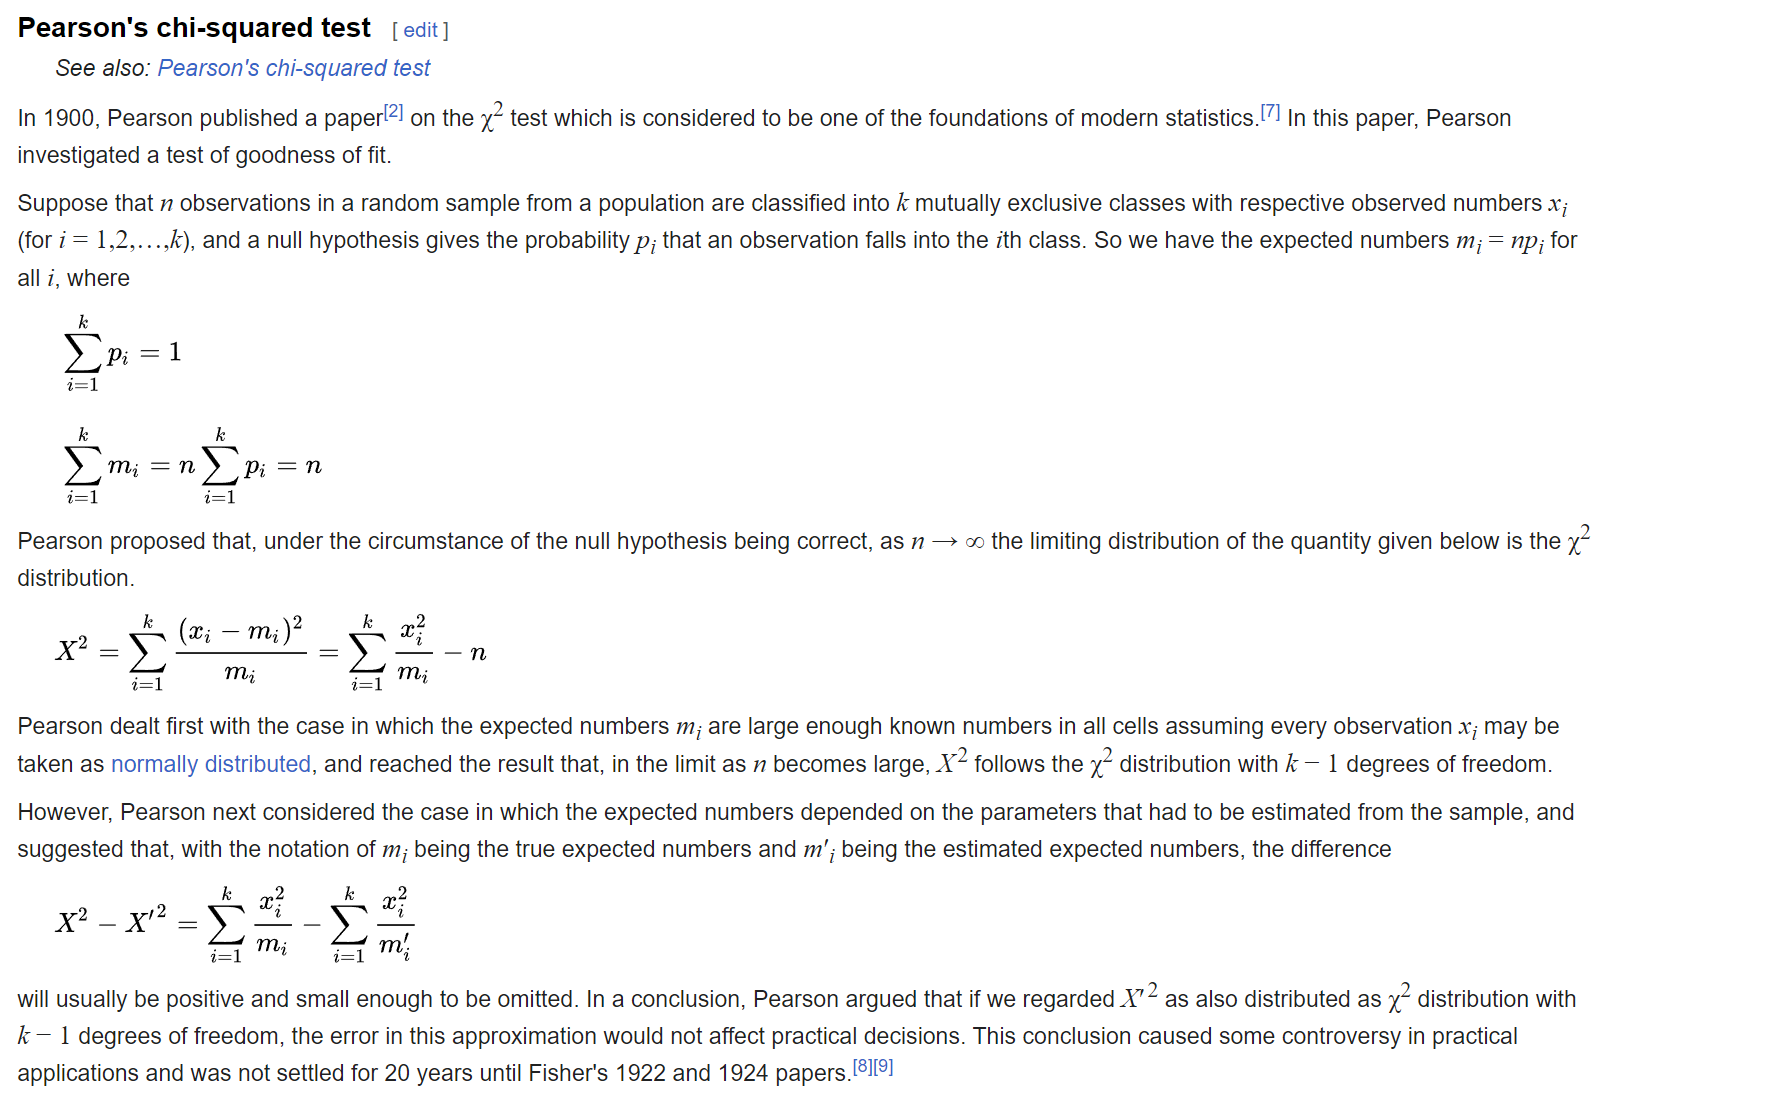

https://en.wikipedia.org/wiki/Chi-squared_test

In [13]:
# suppose n observations in a random sample from a population are classified 
# into k MUTUALLY EXCLUSIVE classes
# observed number in each group - gives hte p that an observations falls inot hte ith clss

#test code - arbitraty number in each group
x = np.array([5, 10 ,3]) #observed data
m = np.array([9,5,4]) #null hypothesis ?population

n = np.sum(x)

chi = np.sum((x - m)**2/m)

print(chi)
stats.chisquare(x,m)





7.027777777777778


Power_divergenceResult(statistic=7.027777777777778, pvalue=0.029780874438135235)

# chi2 tests old code

In [67]:
# Contingency tables and the chi2 test

a = 10
b = 15
c = 20
d = 25

n = a + b + c + d

#create contingency table
data = np.array([[a,c],[b,d]])
ctable = pd.DataFrame(data, columns = ["group1", "group2"], index = ["positive", "negative"])

print(ctable)
#row column order doesnt matter
print(ctable.sum(axis = 1))
print(ctable.sum(axis = 0))

Ea = n*(ctable.sum(axis = 1)[0]/n)*(ctable.sum(axis = 0)[0]/n)
Eb = n*(ctable.sum(axis = 1)[1]/n)*(ctable.sum(axis = 0)[0]/n)
Ec = n*(ctable.sum(axis = 1)[0]/n)*(ctable.sum(axis = 0)[1]/n)
Ed = n*(ctable.sum(axis = 1)[1]/n)*(ctable.sum(axis = 0)[1]/n)
print(a,b,c,d)
print(Ea,Eb,Ec,Ed)

chi2 = ((Ea-a)**2/Ea) + ((Eb-b)**2/Eb) + ((Ec-c)**2/Ec) + ((Ed-d)**2/Ed)
print(chi2) 

#P(chi > 0.604) -> 0.437861

print("SCIPY:")
#print(stats.chisquare([[10,20],[15,25]]))
print(stats.chi2_contingency([[10,15],[20,25]]))


          group1  group2
positive      10      20
negative      15      25
positive    30
negative    40
dtype: int64
group1    25
group2    45
dtype: int64
10 15 20 25
10.714285714285715 14.285714285714286 19.28571428571429 25.714285714285715
0.12962962962962954
SCIPY:
(0.011666666666666653, 0.9139858996305869, 1, array([[10.71428571, 14.28571429],
       [19.28571429, 25.71428571]]))


In [38]:
#Fischer exact test

def fact(x):
    return np.math.factorial(x)


a = 3 #number she correctly guesses!
b = 4-a
c = 4-a
d = 4-b

#create contingency table
data = np.array([[a,c],[b,d]])
ctable = pd.DataFrame(data, columns = ["group1", "group2"], index = ["positive", "negative"])

print(ctable)
#row column order doesnt matter
g1 = ctable.sum(axis = 0)[0]
g2 = ctable.sum(axis = 0)[1]
print(g1,g2)



pc = fact(g1)/(fact(g1-a)*fact(a)) #ways of selecting a (#correct) form g1 (+ve)
pn = fact(g2)/(fact(g2-c)*fact(c)) #ways of selecting c (#incorrect)from g2 (-ve)
pt = fact(g1+g2)/(fact(g1+g2-a-c)*fact(a+c))

P = (pc*pn)/pt
P

          group1  group2
positive       3       1
negative       1       3
4 4


0.22857142857142856